# Other Features

This course has covered a small fraction of the feature of NumPy and SciPy, attempting to focus on what you're most likely to find useful and interesting. In many cases, there will be alternative ways to achieve some of the effects you've seen. If you see another way of doing something in someone else's code or find another way in the documentation, it is likely another valid solution and might even suit your needs better. So, as you experiment with these packages you'll probably develop a more personalised toolbox of functions you use regularly.

This notebook takes a quick look at a number of features that you might want to add to your toolbox, without going into detail on each of them too much. If you're interested in a particular tool, read the linked documentation and experiment with them. The full list of features form NumPy can be found [here](https://numpy.org/doc/stable/reference/) and the full list of SciPy features can be found [here](https://docs.scipy.org/doc/scipy/reference/).

## Constants

A large number of physical constants are included in SciPy in the ```scipy.constants``` [module](https://docs.scipy.org/doc/scipy/reference/constants.html). For instance:

In [1]:
import scipy.constants as constants

print("Speed of light = ", constants.c)
print("Avogadro's Number = ", constants.Avogadro)
print(
    "Electron mass, unit and uncertainty: ",
    constants.physical_constants["electron mass"],
)
print(
    "Standard atmosphere pressure, unit and unvertainty: ",
    constants.physical_constants["standard atmosphere"],
)


Speed of light =  299792458.0
Avogadro's Number =  6.02214076e+23
Electron mass, unit and uncertainty:  (9.1093837015e-31, 'kg', 2.8e-40)
Standard atmosphere pressure, unit and unvertainty:  (101325.0, 'Pa', 0.0)


## Fourier Transforms

A number of different functions which calculate Fourier transforms are found in the ```scipy.fft``` [module](https://docs.scipy.org/doc/scipy/reference/fft.html). For instance:

In [2]:
from scipy.fft import fft
import numpy as np

x = np.array([1, 2, 0, 10, 3, 1, -1, -5])

# The terms are the intensities of frequencies k/n where n is the number of points provided (8) and k is the index of the returned array
print(fft(x))


[ 11.         -0.j        -11.89949494-12.3137085j
   5.         +2.j          7.89949494-10.3137085j
  -5.         -0.j          7.89949494+10.3137085j
   5.         -2.j        -11.89949494+12.3137085j]


## Statistics

A number of different statistical functions, include representations of many Probability Density Functions (PDFs) are found in the ```scipy.stats```  [module](https://docs.scipy.org/doc/scipy/reference/stats.html). For instance:

<class 'scipy.stats._distn_infrastructure.rv_frozen'>
PDF at 8:  0.12098536225957168
CDF at 12:  0.8413447460685429
[ 9.73100876 10.08639548  5.6076509  11.73064757 10.141018   10.76883528
 11.31914822  9.90196362 10.96550742  6.90892242]


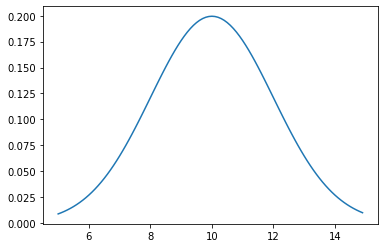

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Create the Gaussian
gaussian = norm(10, 2)

# Check type
print(type(gaussian))

# Create a plot of the Gaussian
x = np.arange(5, 15, 0.1)
y = gaussian.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

# We can find the PDF at a given value
print("PDF at 8: ", gaussian.pdf(8))

# We can find the cumulative density function at a given value
print("CDF at 12: ", gaussian.cdf(12))

# Draw 10 random numbers from the PDF
print(gaussian.rvs(size=10))


## Root Finding and Optimisation

The ```scipy.optimize``` module contains many functions relating to finding minima or roots of a function. For instance:

Minimum
     fun: -10.080229283526167
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 13
     nit: 9
 success: True
       x: 0.6254647223063988
Roots
      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 2.0


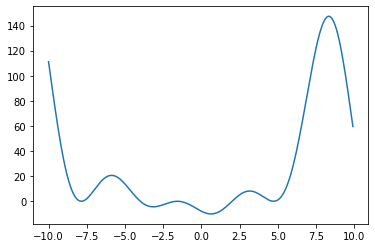

In [5]:
from scipy.optimize import minimize_scalar, root_scalar
import matplotlib.pyplot as plt
import numpy as np


def sample_function(x):
	return (np.sin(x) + 1) * (x - 2) * (x + 4)


# Plot the sample function
x = np.arange(-10, 10, 0.1)
y = sample_function(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

# Find the minimum of the function
print("Minimum")
print(minimize_scalar(sample_function))

# Find the root of the function (i.e. where sample_function returns 0) between 1 and 3
print("Roots")
print(root_scalar(sample_function, method="bisect", bracket=(1, 3)))
